In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating a model based on MNIST Dataset of Handwritten Digits 

Step 1: lets load our dataset of mnist

In [ ]:
from keras.datasets import mnist 
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
print("Initial shape or dimension of x_train:",str(x_train.shape))
print("Number of samples in our trainig data:",str(len(x_train)))
print("Number of labels in our trainig data:",str(len(y_train)))
print("Number of samples in our test data:",str(len(x_test)))
print("Number of labels in our test data:",str(len(y_test)))
print()
print("Dimension of x_train:",str(x_train[0].shape))
print("Labels in y_train:",str(y_train.shape))
print()
print("Dimension of x_test",str(x_test[0].shape))
print("Labels of y_test:",str(y_test.shape))

Initial shape or dimension of x_train: (60000, 28, 28)
Number of samples in our trainig data: 60000
Number of labels in our trainig data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimension of x_train: (28, 28)
Labels in y_train: (60000,)

Dimension of x_test (28, 28)
Labels of y_test: (10000,)


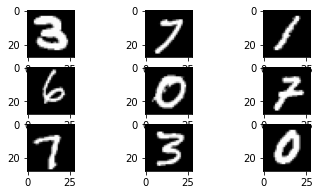

In [ ]:
plt.subplot(431)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(432)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(433)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(434)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(435)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(436)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(437)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(438)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.subplot(439)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap("gray"))

plt.show()

Preparing dataset for training

In [ ]:
# storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]


# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


#store the shape of the single image
input_shape=(img_rows,img_cols,1)

#change our image type to float32 data type
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /=255
x_test /=255

print("x_train shape:",x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples ')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples 


In [ ]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [ ]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras.optimizers import SGD

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

Train our model

In [ ]:
batch_size=32
epochs=10
history=model.fit(x_train,
               y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Epoch 1/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.4534 - accuracy: 0.8619 - val_loss: 0.2014 - val_accuracy: 0.9411
Epoch 2/10
1875/1875 [==============================] - 235s 125ms/step - loss: 0.1793 - accuracy: 0.9462 - val_loss: 0.1152 - val_accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.1193 - accuracy: 0.9634 - val_loss: 0.0789 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.0626 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.0542 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0494 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0528 - accuracy: 0.9841 - val_loss

plotting loss and accuracy charts

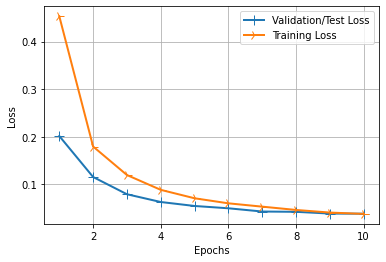

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


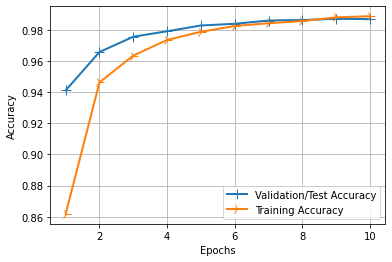

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Save model for future

In [ ]:
#we can also use pickle for this
model.save('C:/Users/Desktop/Deep Learning/mnist.h5')
print("Model Saved")

Model Saved
